<a href="https://colab.research.google.com/github/HHansi/Applied-AI-Course/blob/main/Image%20Processing/Image_Manipulation_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Manipulation - Part 1

This notebook contains the practical examples and exercises for the Applied AI-Image Processing.

*Created by Hansi Hettiarachchi*

# Drive and File Setup

(This is an optional step to make things easier.)

When you work with large datasets like images, uploading the dataset to the Colab environment takes longer, and it is time-consuming to upload the dataset every time you need to use it.

The simplest solution is
1. Uploading the dataset to Google Drive,
2. Mounting Drive to Colab, and
3. Accessing the dataset in Google Drive via Colab.

This approach requires a one-time upload, and it is more efficient.

Run the following code to mount Google Drive.

In [ ]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


If your data is in a .zip file within the drive, you can use the following code to unzip it.

<font color='red'>You need to run this code once. When you unzip your data, the unzipped folder will remain in your Drive.</font>

<font color='red'>Note: Please make sure to update the following paths according to your saved locations.</font>

In [ ]:
# unzip file
import shutil
shutil.unpack_archive('/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data/sample_images.zip', '/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data', 'zip')

## Accessing Data

In [ ]:
import os  # to handle file paths

Let's define a variable that holds the path to the data folder so we can reuse it without rewriting this long path.

<font color='red'>Note: Please make sure to update the following path with where your sample_images folder is located.</font>

In [ ]:
data_folder = '/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data/sample_images'

We can use **os module/library in Python** to get paths to separate files within the data folder, as shown below.

In [ ]:
# paths of separate files in a folder
print(os.path.join(data_folder, 'mickey_mouse.jpg'))

/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data/sample_images/mickey_mouse.jpg


# Digital Image Representation

Computers use a matrix composed of numeric values to represent images.

In [ ]:
import cv2  # opencv-python

import matplotlib.pyplot as plt
import numpy as np

### Load Image

height, width, channels: (139, 85, 3)



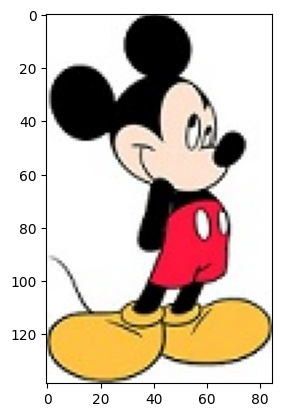

In [ ]:
# load an image using its file path
img = cv2.imread(os.path.join(data_folder, 'mickey_mouse.jpg'))

# print matrix dimensions
print(f'height, width, channels: {img.shape}\n')

# show loaded image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### <font color='green'>**Activity 1**</font>

Why are there three dimensions in the above image, and what does each dimension represent?

### Save Image

In [ ]:
cv2.imwrite("/content/mickey_mouse2.jpg", img)

True

# Image Manipulation Techniques

## Gray Scaling

Coverting images to a range of monochromatic shades from black to white.

More details about <i>cvtColor</i> function is available in the [documentation]( https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#void%20cvtColor%28InputArray%20src,%20OutputArray%20dst,%20int%20code,%20int%20dstCn%29).

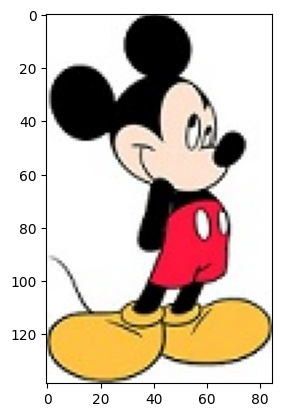

In [ ]:
# load an image using its file path
img = cv2.imread(os.path.join(data_folder, 'mickey_mouse.jpg'))

# show original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

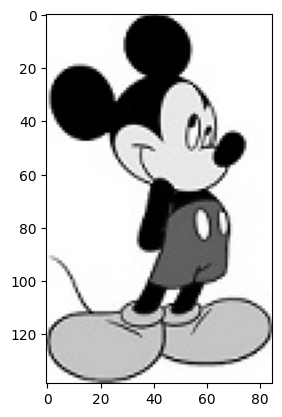

In [ ]:
#  covert a coloured "img" to its gray-scaled version
img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# show gray-scaled image
plt.imshow(cv2.cvtColor(img_grayscaled, cv2.COLOR_BGR2RGB))

### <font color='green'>**Activity 2**</font>

Write a code to print the dimensions of the original image ("img") and the grayscaled image ("img_grayscaled").

How did the dimensions differ, and why?

## Flipping

A flip (mirror effect) reverses the pixels horizontally or vertically.

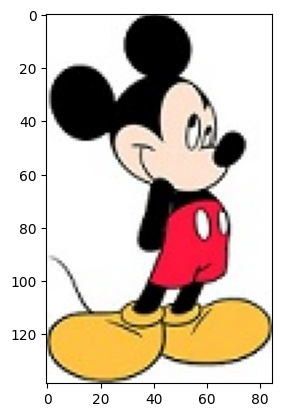

In [ ]:
# load an image using its file path
img = cv2.imread(os.path.join(data_folder, 'mickey_mouse.jpg'))

# show original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 1. Vertical Flip

flipCode = 0 (flip around the x-axis)

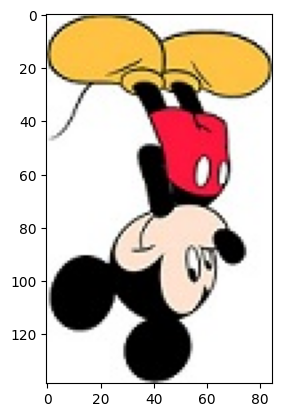

In [ ]:
# Vertical flip
img_vflipped = cv2.flip(img, 0)

# show flipped image
plt.imshow(cv2.cvtColor(img_vflipped, cv2.COLOR_BGR2RGB))

### 2. Horizontal Flip

flipCode = 1 (flip around the y-axis)

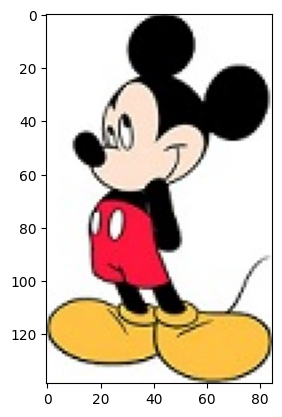

In [ ]:
# Horizontal flip
img_hflipped = cv2.flip(img, 1)

# show flipped image
plt.imshow(cv2.cvtColor(img_hflipped, cv2.COLOR_BGR2RGB))

### 3. Vertical and Horizontal Flip

flipCode = -1 (flip around both axes)

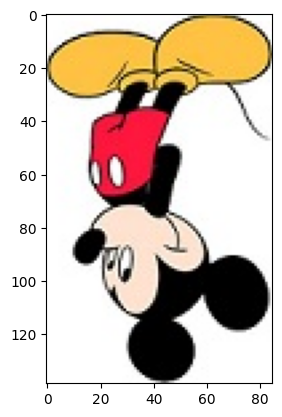

In [ ]:
# Combined flip (vertical and horizontal)
img_flipped = cv2.flip(img, -1)

# show flipped image
plt.imshow(cv2.cvtColor(img_flipped, cv2.COLOR_BGR2RGB))

## Rotation

Image rotation turns an image in a clockwise or counterclockwise direction.

Different [rotate codes](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga6f45d55c0b1cc9d97f5353a7c8a7aac2) supported by <i>rotate</i> function are as follows:
- cv2.ROTATE_90_CLOCKWISE - Rotate 90 degrees clockwise
- cv2.ROTATE_90_COUNTERCLOCKWISE - Rotate 270 degrees clockwise
- cv2.ROTATE_180 - Rotate 180 degrees clockwise

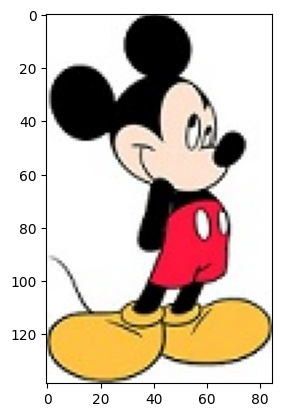

In [ ]:
# load an image using its file path
img = cv2.imread(os.path.join(data_folder, 'mickey_mouse.jpg'))

# show original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Rotate 90 degrees

True

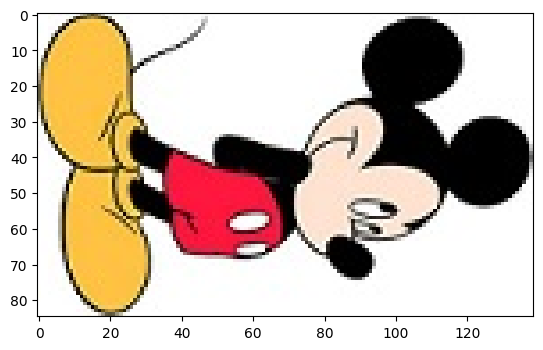

In [ ]:
# Rotate 90 degree clockwise
img_rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

# show rotated image
plt.imshow(cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB))

# save image
cv2.imwrite("/content/mm_90_rotation.jpg", img_rotated)

### Rotate 45 degrees

True

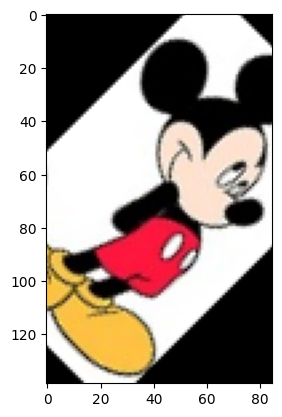

In [ ]:
(height, width, channels) = img.shape
center = (width / 2, height / 2)

angle = -45
scale = 1.0
matrix = cv2.getRotationMatrix2D(center, angle, scale)
img_rotated_45 = cv2.warpAffine(img, matrix, (width, height))

# show rotated image
plt.imshow(cv2.cvtColor(img_rotated_45, cv2.COLOR_BGR2RGB))

# save image
cv2.imwrite("/content/mm_45_rotation.jpg", img_rotated_45)

### <font color='green'>**Activity 3**</font>

Carefully analyse the 90-degree and 45-degree rotations. Which rotation do you prefer, if you were asked to pick one and why?

Why do you think the rotation codes are limited to 90, 180 and 270 degrees?